# 계산전자공학 입문_홍성민, 박홍현 공저
https://www.youtube.com/@TCADHong \
https://github.com/hi2ska2/sample \
Repositories / sample / python / pn diode

## Exercise_2_11_1

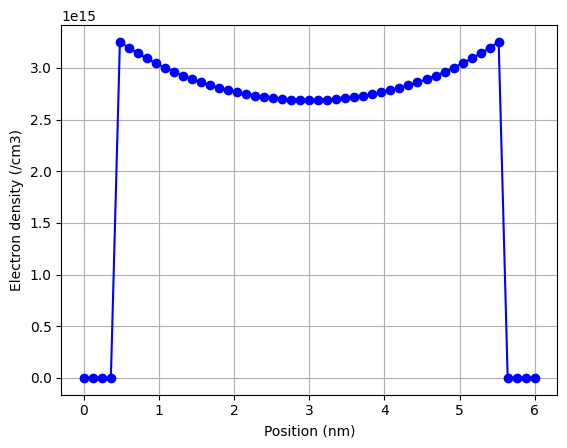

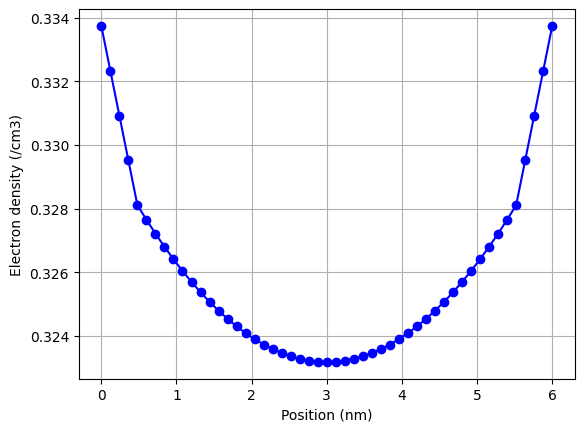

(None, None)

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

q = 1.602192e-19
epsilon0 = 8.854187817e-12
nint = 1e16
kB = 1.38065e-23 # Boltzmann constant
T = 300.0
VT = kB*T/q

# a is the length in m.
a = 6e-9
tox = 0.5e-9
N = 50
l0 = a/N
iox = round(tox/l0)
interface1 = iox
interface2 = N-iox
epsilon_si = 11.7
epsilon_ox = 3.9
Ndop = -1e24

x = np.arange(N+1)* a / N

phi = np.zeros( (N+1, 1  ) )
hole = np.zeros( (N+1, 1  ) )
elec = np.zeros( (N+1, 1  ) )

A = np.zeros( (N+1, N+1) )
b = np.zeros( (N+1, 1  ) )

for inewton in range(1,10):
    #print(inewton)
    # phi, newton
    for ii in range(1,N):    
        epsilon_l = epsilon_ox #left
        epsilon_r = epsilon_ox #right
        if ii>=interface1+1 and ii<=interface2:
            epsilon_l = epsilon_si
        if ii>=interface1 and ii<=interface2-1:
            epsilon_r = epsilon_si    

        b[ii] = epsilon_r*(phi[ii+1]-phi[ii])-epsilon_l*(phi[ii]-phi[ii-1])
        A[ii,ii-1] = epsilon_l
        A[ii,ii  ] = -epsilon_l-epsilon_r
        A[ii,ii+1] = epsilon_r
    # jacobian
    for ii in range(interface1,interface2+1):
        control = 1.0
        if ii==interface1 or ii==interface2:
            control = 0.5
        hole[ii] = nint*np.exp(-phi[ii]/VT)
        elec[ii] = nint*np.exp( phi[ii]/VT)
        b[ii] = b[ii] + q*(hole[ii][0]-elec[ii][0]+Ndop)/epsilon0*l0*l0*control
        A[ii,ii] = A[ii,ii] - q*(hole[ii][0]+elec[ii][0])/VT/epsilon0*l0*l0*control
        # Check and Extract Single Elements: Ensure that hole[ii] and elec[ii] are scalars. If they are arrays, extract the scalar value explicitly, e.g.:
        # This assumes that hole[ii] and elec[ii] are one-dimensional arrays and you need the first element.
    # boundary condition
    b[0] = phi[0] - 0.33374
    A[0,0] = 1
    b[N] = phi[N] - 0.33374
    A[N,N] = 1

    update = np.linalg.solve(A, -b)

    phi = phi + update
#print(elec/1e6)
plt.plot(x/1e-9,elec/1e6,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Electron density (/cm3)')
plt.grid(), plt.show()

#print(phi)
plt.plot(x/1e-9,phi,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Electron density (/cm3)')
plt.grid(),plt.show()



update= [1] [[ 0.33374         0.32928577      0.32705866      0.32705866       0.32928577      0.33374   ]]\
update= [2] [[-7.21675546e-16 -1.56200557e-05 -2.30927280e-05 -2.30927280e-05  -1.56200557e-05  0.00000000e+00]]\
update= [3] [[-7.73272474e-27 -4.46768092e-12 -7.44882944e-12 -7.44882944e-12  -4.46768092e-12  0.00000000e+00]]\
update= [4] [[ 1.68560022e-32  2.25325630e-17 -1.06761507e-17 -1.06761507e-17   2.25325630e-17  0.00000000e+00]]\
모두가 "0"이다.

phi= [[0.33374    0.32928577 0.32705866 0.32705866 0.32928577 0.33374   ]]\
phi= [[0.33374    0.32927015 0.32703556 0.32703556 0.32927015 0.33374   ]]\
phi= [[0.33374    0.32927015 0.32703556 0.32703556 0.32927015 0.33374   ]]\
phi= [[0.33374    0.32927015 0.32703556 0.32703556 0.32927015 0.33374   ]]\


dx= 1.2e-10 Nox= 4 interface1= 4 interface2= 46
phi0= [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


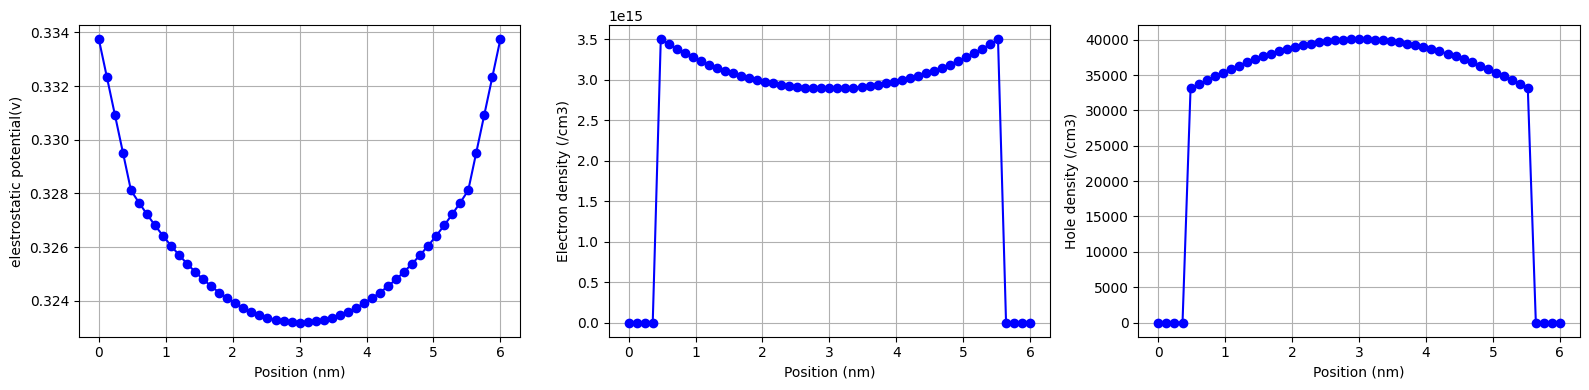

(None, None)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

q = 1.602192e-19; epsilon0 = 8.854187817e-12; nint = 1.076e10*1e6; kB = 1.380662e-23; T = 300.0; VT = kB*T/q

a = 6e-9; tox = 0.5e-9; epsilon_si = 11.7; epsilon_ox = 3.9; Ndop = -1e18*1e6
N = 50; dx = a/N; Nox = round(tox/dx); interface1 = Nox; interface2 = N-Nox
print("dx=",dx,"Nox=",Nox, "interface1=",interface1, "interface2=",interface2 )
x = np.arange(N+1)*dx

phi = np.zeros((N+1, 1  )); hole = np.zeros((N+1, 1  )); elec = np.zeros((N+1, 1  ))
A = np.zeros((N+1, N+1)); b = np.zeros((N+1, 1  ))

# newton raphson iteration
for inewton in range(1,10):
    # initial potential value to cal jacobian equation    
    for ii in range(1,N):
        epsilon_l = epsilon_ox; epsilon_r = epsilon_ox
        if ii>=interface1+1 and ii<=interface2:
            epsilon_l = epsilon_si
        if ii>=interface1 and ii<=interface2-1:
            epsilon_r = epsilon_si
        A[ii,ii-1] = epsilon_l
        A[ii,ii  ] = -epsilon_l-epsilon_r
        A[ii,ii+1] = epsilon_r
        b[ii] = epsilon_r*(phi[ii+1]-phi[ii])-epsilon_l*(phi[ii]-phi[ii-1])
        
    for ii in range(interface1,interface2+1): 
        control = 1.0
        if ii==interface1 or ii==interface2: 
            control = 0.5
        hole[ii] = nint*np.exp(-phi[ii]/VT)
        elec[ii] = nint*np.exp( phi[ii]/VT)
        A[ii,ii] = A[ii,ii] - q*(hole[ii][0]+elec[ii][0])*dx**2*control/VT/epsilon0 #Jacobina matrix J*delta_phi=-residue
        b[ii] = b[ii] + q*(hole[ii]-elec[ii]+Ndop)*dx**2*control/epsilon0 #residue vector

    b[0] = phi[0] - 0.33374
    b[N] = phi[N] - 0.33374
    A[0,0] = 1
    A[N,N] = 1 
    update=np.linalg.solve(A,-b)
    phi=phi+update
    #print("update=",[inewton],[ii],update.T)    
    #print("phi=",[inewton],[ii],phi.T)    
    
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(x/1e-9,phi,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('elestrostatic potential(v)')
plt.grid()

plt.subplot(132)
plt.plot(x/1e-9,elec/1e6,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Electron density (/cm3)')
plt.grid()

plt.subplot(133)
plt.plot(x/1e-9,hole/1e6,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Hole density (/cm3)')
plt.grid()

plt.tight_layout(), plt.show()
